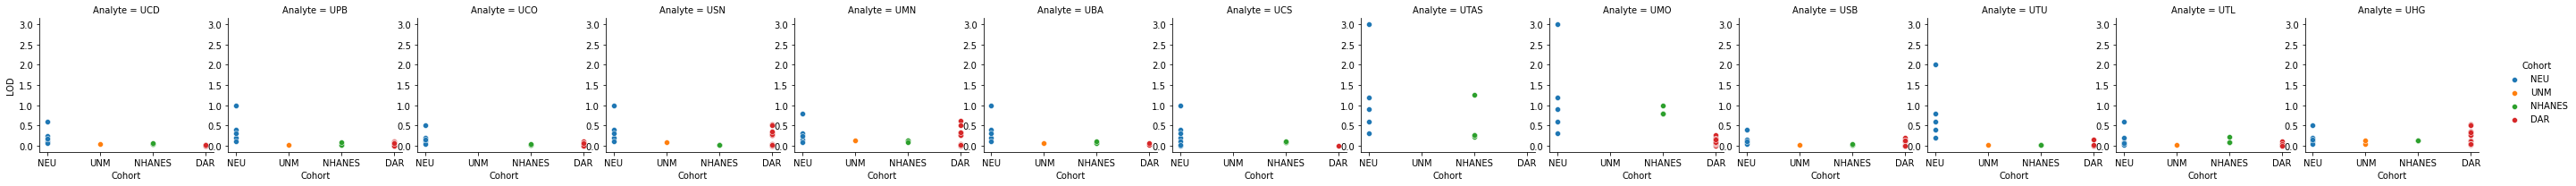

In [8]:
import pandas as pd
harm_cols = ['UMN', 'UCO', 'UCS','UBA', 'USN', 'UTL','UTU', 'UCD', 'UMO', 'USB', 'UPB', 'UHG', 'UTAS']
df = pd.read_csv('all_LODS_by_cohort.csv')
df = df[df['Analyte'].isin(harm_cols)]
import seaborn as sns
g = sns.FacetGrid(df, col="Analyte", hue="Cohort")
g.map(sns.scatterplot, "Cohort", "LOD")
g.add_legend()
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)